In [8]:
from google.colab import files
uploaded = files.upload()   # select cleaned_global_water_consumption.csv

import pandas as pd
df = pd.read_csv("cleaned_global_water_consumption.csv")

print(df.head())   # check first rows


Saving cleaned_global_water_consumption.csv to cleaned_global_water_consumption (1).csv
     Country  Year  Total Water Consumption (Billion Cubic Meters)  \
0  Argentina  2000                                      481.490000   
1  Argentina  2001                                      455.063000   
2  Argentina  2002                                      482.749231   
3  Argentina  2003                                      452.660000   
4  Argentina  2004                                      634.566000   

   Per Capita Water Use (Liters per Day)  Agricultural Water Use (%)  \
0                             235.431429                   48.550000   
1                             299.551000                   48.465000   
2                             340.124615                   50.375385   
3                             326.756667                   49.086667   
4                             230.346000                   38.670000   

   Industrial Water Use (%)  Household Water Use (%)  \
0 

In [9]:
features = [
    "Year",
    "Agricultural Water Use (%)",
    "Industrial Water Use (%)",
    "Household Water Use (%)",
    "Rainfall Impact (Annual Precipitation in mm)",
    "Groundwater Depletion Rate (%)"
]
target = "Total Water Consumption (Billion Cubic Meters)"

X = df[features]
y = df[target]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: -0.027789619680766542
MAE: 76.31168998996667
RMSE: 99.0749479735561


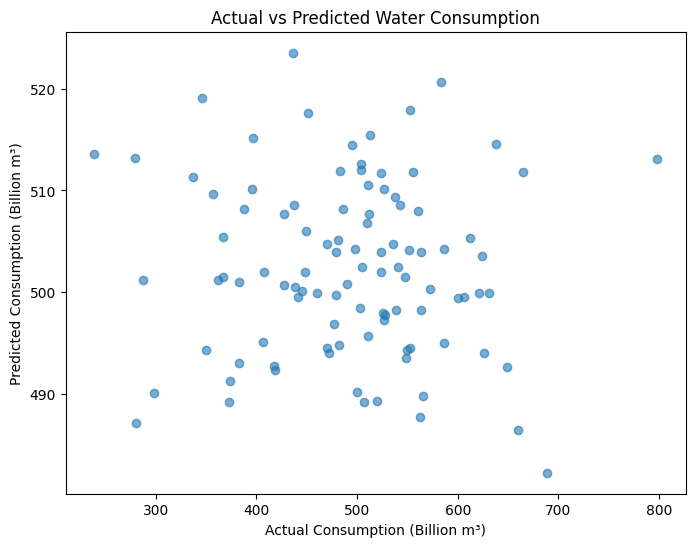

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Consumption (Billion m³)")
plt.ylabel("Predicted Consumption (Billion m³)")
plt.title("Actual vs Predicted Water Consumption")
plt.show()